# Deep Learning Image Segmentation Tutorial

In this tutorial, we will explore the topic of deep learning image segmentation. Image segmentation is a critical computer vision task that involves partitioning an image into multiple segments or regions to facilitate understanding and analysis. Deep learning techniques, especially convolutional neural networks (CNNs), have shown remarkable performance in image segmentation tasks by leveraging their ability to learn complex visual representations directly from the data.

## Introduction to Image Segmentation

Image segmentation plays a crucial role in various computer vision applications, including object detection, semantic understanding, medical imaging, and autonomous driving. It aims to identify and delineate meaningful regions within an image, enabling fine-grained analysis and understanding of the visual content. By assigning labels or masks to individual pixels or groups of pixels, image segmentation provides a detailed understanding of objects, boundaries, and context within an image.

### Types of Image Segmentation

There are several types of image segmentation techniques, each addressing different aspects of the segmentation task:

1. **Semantic Segmentation**: Semantic segmentation assigns a class label to each pixel in an image, effectively categorizing it into meaningful object classes. For example, in an autonomous driving scenario, pixels can be classified as "car," "person," or "background." Semantic segmentation provides a high-level understanding of the image's content.

2. **Instance Segmentation**: Instance segmentation goes beyond semantic segmentation by not only classifying pixels into object classes but also distinguishing individual instances of objects within an image. For example, in a scene with multiple cars, instance segmentation can separate each car instance and assign a unique label to it.

3. **Boundary Detection**: Boundary detection focuses on locating and highlighting the boundaries or edges between different objects or regions in an image. This technique aids in precisely delineating object contours, which is essential for tasks like object recognition and shape analysis.

4. **Panoptic Segmentation**: Panoptic segmentation combines both semantic and instance segmentation to provide a comprehensive understanding of an image. It assigns unique labels to each instance while also providing semantic segmentation for background regions. Panoptic segmentation aims to bridge the gap between recognizing objects and understanding the overall scene.

### Deep Learning for Image Segmentation

Deep learning techniques have revolutionized image segmentation by automatically learning intricate features and patterns directly from the data. Convolutional neural networks (CNNs) have proven to be particularly effective in capturing spatial dependencies and hierarchical representations in images, making them well-suited for image segmentation tasks.

In recent years, advanced architectures such as U-Net, PSPNet, and Mask R-CNN have achieved state-of-the-art performance in image segmentation. These architectures incorporate various techniques to improve segmentation accuracy:

- **Skip Connections**: Skip connections establish direct connections between encoder and decoder layers, enabling the fusion of low-level and high-level features. This helps preserve fine-grained details during the upsampling process.

- **Dilated Convolutions**: Dilated convolutions, also known as atrous convolutions, increase the receptive field of convolutional layers without losing spatial resolution. They allow models to capture larger context while retaining detailed information.

- **Multi-Scale Context Aggregation**: Techniques such as pooling, pyramid pooling, and atrous spatial pyramid pooling (ASPP) are used to aggregate features at multiple scales. This enables the model to capture both local and global context, enhancing segmentation performance.

The U-Net architecture, in particular, has gained significant popularity for its effectiveness in medical image segmentation tasks. It employs an encoder-decoder structure with skip connections, enabling precise localization and segmentation of objects. In this tutorial, we will focus on building a U-Net model for image segmentation.

In the upcoming sections, we will walk through the implementation of an image segmentation model using the U-Net architecture. We will cover dataset preparation, model building, training strategies, evaluation metrics, and advanced techniques in image segmentation. By the end of this tutorial, you will have a comprehensive understanding of deep learning image segmentation and be able to apply it to solve complex segmentation challenges in your own projects.

---

In this tutorial, we will cover the following topics:

1. Introduction to Image Segmentation
2. Setting up the Environment
3. Loading and Preparing the Dataset
4. Custom Data Generator
5. Building the UNet Model
6. Training the Model
7. Evaluating the Model
8. Conclusion




I used the same model in the [here](https://github.com/H-arshit/UNET-On-COCO/blob/master/Keras_COCO_UNET.ipynb)

In [1]:
!pip install pycocotools

  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp310-cp310-linux_x86_64.whl size=101741 sha256=b00b70c4c9f49c77f01fcfc58d31b968bc6ce5c41ac178d5a5eb1546f6754cfb
  Stored in directory: /root/.cache/pip/wheels/58/e6/f9/f87c8f8be098b51b616871315318329cae12cdb618f4caac93
Successfully built pycocotools


In [2]:
!pip install --upgrade scikit-image scipy

In [3]:
!pip uninstall -y numpy==1.23.5
!pip install "numpy>=1.16.5, <1.23.0"

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.4 which is incompa

## 2. Setting up the Environment

Before we begin, let's set up the environment by installing the necessary libraries and importing the required modules.


In this code snippet, we install the `pycocotools` library, which is a Python API for the Microsoft Common Objects in Context (COCO) dataset. We also import various modules and libraries that we will use throughout the tutorial.



In [4]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
!pip uninstall -y tensorflow-io
!pip install tensorflow-io

Found existing installation: tensorflow-io 0.31.0
Uninstalling tensorflow-io-0.31.0:
  Successfully uninstalled tensorflow-io-0.31.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0


## 3. Loading and Preparing the Dataset

To train and evaluate our image segmentation model, we need a dataset with annotated masks. In this tutorial, we will use the COCO dataset, which is a large-scale dataset for object detection, segmentation, and captioning.

We need to load the annotation files for the COCO dataset, which contain information about the object instances and their corresponding masks.


In the code above, we load the COCO annotation files for the training and validation sets. We specify the object classes of interest (in this case, only "person"). We retrieve the image and category IDs corresponding to the specified classes. We also load the image dictionaries for both the training and validation sets.

After loading the necessary data, we print the number of training and validation images and categories. We shuffle the image IDs to introduce randomness during training. Additionally, we select a subset of validation image IDs for faster evaluation.



In [6]:
from tensorflow import keras


# Load paths for the COCO dataset annotation files
ANNOTATION_FILE_TRAIN = '/kaggle/input/coco2014/captions/annotations/instances_train2014.json'
ANNOTATION_FILE_VAL = '/kaggle/input/coco2014/captions/annotations/instances_val2014.json'

# Define the object classes of interest
classes = ['person']

# Initialize COCO instances for training set and load relevant data
coco_train = COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=classes)
imgIds_train = coco_train.getImgIds(catIds=catIds_train)
imgDict_train = coco_train.loadImgs(imgIds_train)

# Initialize COCO instances for validation set and load relevant data
coco_val = COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=classes)
imgIds_val = coco_val.getImgIds(catIds=catIds_val)
imgDict_val = coco_val.loadImgs(imgIds_val)

# Print the number of training and validation images and categories
print(len(imgIds_train), len(catIds_train))
print(len(imgIds_val), len(catIds_val))

# Shuffle the training and validation image IDs
shuffle(imgIds_train)
shuffle(imgIds_val)

# Select a subset of validation image IDs
imgIds_val = imgIds_val[0:2000]
imgIds_train = imgIds_train[0:60000]
# Generate the list of file names for training and validation person images
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Print the number of training and validation person images
print(len(train_images_person), len(val_images_person))

# Generate the list of file names for training person images
train_images_person = ["COCO_train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]

# Generate the list of file names for validation person images
val_images_person = ["COCO_val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

# Check the number of files in the validation images directory
len(os.listdir("/kaggle/input/coco2014/val2014/val2014"))

# Create a directory to store the generated training masks
!mkdir mask_train_2014

# Initialize a count variable
count = 0 

# Generate the masks for training images
for ID in imgIds_train:

    # Set the file path for the mask
    file_path = "/kaggle/working/mask_train_2014/COCO_train2014_{0:012d}.jpg".format(ID)

    # Retrieve a random image ID from the training set
    sampleImgIds = coco_train.getImgIds(imgIds=[ID])
    sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
    anns = coco_train.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_train.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_train.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)
    count = count + 1

# Create a directory to store the generated validation masks
!mkdir mask_val_2014

# Reset the count variable
count = 0

# Generate the masks for validation images
for ID in imgIds_val:

    # Set the file path for the mask
    file_path = "/kaggle/working/mask_val_2014/COCO_val2014_{0:012d}.jpg".format(ID)

    # Retrieve a random image ID from the validation set
    sampleImgIds = coco_val.getImgIds(imgIds=[ID])
    sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    # Retrieve the annotation IDs and annotations for the image
    annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
    anns = coco_val.loadAnns(annIds)

    # Generate the mask by combining the individual instance masks
    mask = coco_val.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_val.annToMask(anns[i])

    # Convert the mask to an image and save it
    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)

    count = count + 1

    


loading annotations into memory...
Done (t=16.61s)
creating index...
index created!
loading annotations into memory...
Done (t=9.39s)
creating index...
index created!
45174 1
21634 1
45174 2000


## 4. Custom Data Generator

To efficiently handle the large amount of image and mask data, we create a custom data generator class. This class will generate batches of preprocessed images and masks for training the UNet model.

In the code above, we define a `CustomDataGenerator` class that extends the `keras.utils.Sequence` class. This allows us to use the data generator with the Keras model's training functions.

The `CustomDataGenerator` class takes the paths to the directories containing the original images and corresponding masks, as well as the batch size as input. It has attributes to store the image and mask filenames and methods to retrieve the matching filenames between images and masks.

The `__len__` method returns the number of batches in the generator, and the `__getitem__` method generates a batch of preprocessed images and masks. Inside the `__getitem__` method, we load the images and masks, resize them to a desired size (128x128 in this case), and convert them to numpy arrays. We also perform normalization by dividing the pixel values by 255.0.



In [7]:
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        """
        CustomDataGenerator class for generating batches of preprocessed images and masks.

        Args:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.

        Attributes:
            images_path (str): Path to the directory containing the original images.
            masks_path (str): Path to the directory containing the corresponding masks.
            batch_size (int): Number of samples in each batch.
            image_filenames (list): List of matching filenames between images and masks.
            mask_filenames (list): List of matching filenames between masks and images.
        """
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        """
        Get the list of matching filenames between images and masks.

        Returns:
            list: List of matching filenames.
        """
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        """
        Get the number of batches in the generator.

        Returns:
            int: Number of batches.
        """
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        """
        Get a batch of preprocessed images and masks.

        Args:
            idx (int): Batch index.

        Returns:
            tuple: Batch of preprocessed images and masks.
        """
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Check if image and mask have the same dimensions
            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            # Resize the images and masks to size 128x128
            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            # Convert the images and masks to arrays
            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            # Check if image has 3 channels and shape of (128, 128, 3)
            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                # Normalize the pixel values if needed
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                # Append the preprocessed images and masks to the batch
                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)
        
        # Convert the batch images and masks to numpy arrays and return
        return np.array(batch_images), np.array(batch_masks)




In [8]:
# Usage
images_path = '/kaggle/input/coco2014/train2014/train2014'
masks_path = '/kaggle/working/mask_train_2014'
batch_size = 8

# Create an instance of the CustomDataGenerator
train_generator = CustomDataGenerator(images_path, masks_path, batch_size)


In [9]:
# Print the number of files in the train2014 directory containing original images
print(len(os.listdir("/kaggle/input/coco2014/train2014/train2014")))

# Print the number of files in the mask_train_2014 directory containing generated masks
print(len(os.listdir("/kaggle/working/mask_train_2014")))

# Print the number of files in the val2014 directory containing original images
print(len(os.listdir("/kaggle/input/coco2014/val2014/val2014")))

# Print the number of files in the mask_val_2014 directory containing generated masks
print(len(os.listdir("/kaggle/working/mask_val_2014")))


82783
45174
40504
2000


Mask Image Shape: (640, 480)
Main Image Shape: (640, 480, 3)


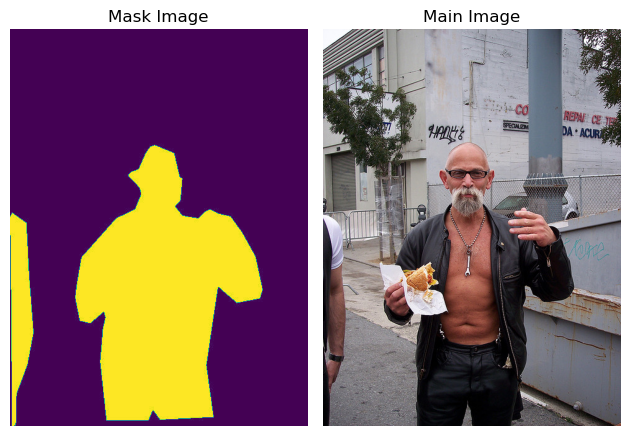

In [10]:
# Get the list of mask filenames
mask_filenames = [filename for filename in os.listdir(masks_path) if filename.endswith('.jpg')]

# Assuming the first image in the mask folder is the one to plot
first_mask_filename = mask_filenames[0]
image_filename = os.path.splitext(first_mask_filename)[0] + '.jpg'

# Load and plot the mask image
mask_image = Image.open(os.path.join(masks_path, first_mask_filename))
plt.subplot(1, 2, 1)
plt.imshow(mask_image)
plt.title('Mask Image')
plt.axis('off')

# Load and plot the corresponding main image
main_image = Image.open(os.path.join(images_path, image_filename))
plt.subplot(1, 2, 2)
plt.imshow(main_image)
plt.title('Main Image')
plt.axis('off')

# Print the shapes of the images
print('Mask Image Shape:', np.array(mask_image).shape)
print('Main Image Shape:', np.array(main_image).shape)

plt.tight_layout()
plt.show()


## 5. Building the UNet Model

Next, we define the architecture for the UNet model. The UNet architecture is a popular choice for image segmentation tasks due to its ability to capture both low-level and high-level features.



In the code above, we define several functions to build the UNet model. These functions are used to create different blocks of the model: down blocks, bottleneck block, up blocks, and the output block.

The `down_block` function takes an input tensor, the number of filters, kernel size, strides, padding, kernel initializer, and max pooling parameters. It applies two convolutional layers with batch normalization and activation functions, followed by max pooling. The output of this function is the processed tensor and the pooled tensor for skip connections.

The `bottle_neck` function takes an input tensor, the number of filters, kernel size, strides, padding, and kernel initializer. It applies two convolutional layers with batch normalization and activation functions. The output of this function is the processed tensor.

The `up_block` function takes an input tensor, the number of filters, the skip connection tensor from the corresponding down block, kernel size, strides, upsampling factor, max pooling window, padding, and kernel initializer. It performs upsampling on the input tensor, concatenates it with the skip connection tensor, and applies two convolutional layers with batch normalization and activation functions. The output of this function is the processed tensor.

The `output_block` function takes an input tensor, padding, and kernel initializer. It applies two convolutional layers, the first with 2 filters and the second with 1 filter, both followed by activation functions. The output of this function is the final output tensor.

Finally, we define the `UNet` function that creates the entire UNet model using the previously defined blocks. It takes the input shape as an argument and returns the model.

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import keras
from keras.layers import *
from keras.optimizers import *

def down_block(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    # conv for skip connection
    conv = Activation("relu")(conv)

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool

def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv

def up_block(    
    input_tensor,
    no_filters,
    skip_connection, 
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):
    
    
    conv = Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size = upsampling_factor)(input_tensor))
    
    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv) 
    
    
    conv = concatenate( [skip_connection , conv]  , axis = -1)
    
    
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)
    
    return conv


def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal"
):
    
    conv = Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    
    
    conv = Conv2D(
        filters=1,
        kernel_size=(1,1),
        strides=(1,1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    
    
    return conv
    

def UNet(input_shape = (128,128,3)):
    
    filter_size = [64,128,256,512,1024]
    
    inputs = Input(shape = input_shape)
    
    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d4 , p4 = down_block(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    b = bottle_neck(input_tensor= p4,
                         no_filters=filter_size[4],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal")
    
    
    
    u4 = up_block(input_tensor = b,
                  no_filters = filter_size[3],
                  skip_connection = d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    u3 = up_block(input_tensor = u4,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    
    output = output_block(input_tensor=u1 , 
                         padding = "same",
                         kernel_initializer= "he_normal")
    
    model = keras.models.Model(inputs = inputs , outputs = output)
    
    
    return model
    
model = UNet(input_shape = (128,128,3))
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)




## 6. Compiling and Training the Model

```python
model = UNet(input_shape=(128, 128, 3))
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

images_path = '/kaggle/input/coco2014/val2014/val2014'
masks_path = '/kaggle/working/mask_val_2014'
batch_size = 8

val_generator = CustomDataGenerator(images_path, masks_path, batch_size)

train_steps = len(os.listdir("/kaggle/working/mask_train_2014/")) / batch_size
model.fit(train_generator, validation_data=val_generator, steps_per_epoch=train_steps, epochs=20)
```

In the code above, we create an instance of the UNet model with an input shape of (128, 128, 3). We compile the model using the Adam optimizer with a learning rate of 1e-4 and the binary cross-entropy loss function. We also specify the accuracy as a metric to monitor during training.

Next, we create a validation generator using the `CustomDataGenerator` class with the paths to the validation images and masks, as well as the batch size.

We calculate the number of steps per epoch for training by dividing the total number of training mask files by the batch size.

Finally, we train the model using the `fit` function. We pass the training generator, validation generator, number of steps per epoch, and the desired number of epochs.



In [12]:
images_path = '/kaggle/input/coco2014/val2014/val2014'
masks_path = '/kaggle/working/mask_val_2014'
batch_size = 8

val_generator = CustomDataGenerator(images_path, masks_path, batch_size)

# Fit the model with the training generator
train_steps =  len(os.listdir( "/kaggle/working/mask_train_2014/"))/batch_size


In [13]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import MeanIoU, Precision, Recall, AUC, Accuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import datetime

# Define the paths for saving model checkpoints and logs
checkpoint_path = '/kaggle/working/checkpoints/model_checkpoint.h5'
log_dir = '/kaggle/working/logs/'

# Define the number of epochs and batch size
epochs = 50
batch_size = 8

# Define callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, save_best_only=True),
    ReduceLROnPlateau(factor=0.7, patience=5)
]

# Create a timestamp for unique log directory
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = log_dir + current_time

# Define loss function, metrics, and optimizer
loss_fn = BinaryCrossentropy()
metrics = [
    MeanIoU(num_classes=2),
    Precision(),
    Recall(),
    AUC(),
    'accuracy'
]
optimizer = Adam(lr=1e-4)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

# Fit the model with the training generator
history = model.fit(train_generator, validation_data=val_generator, steps_per_epoch=train_steps,
                    epochs=epochs, batch_size=batch_size, callbacks=callbacks, verbose=1)

# Save the final trained model
model.save('/kaggle/working/final_model.h5')


Epoch 1/50
5646/5646 [==============================] - 910s 159ms/step - loss: 0.2676 - mean_io_u: 0.4309 - precision: 0.7361 - recall: 0.4496 - auc: 0.8964 - accuracy: 0.8616 - val_loss: 0.2187 - val_mean_io_u: 0.4287 - val_precision: 0.8073 - val_recall: 0.5735 - val_auc: 0.9346 - val_accuracy: 0.8825 - lr: 1.0000e-04
Epoch 2/50
5646/5646 [==============================] - 790s 140ms/step - loss: 0.2049 - mean_io_u: 0.4309 - precision: 0.8082 - recall: 0.5968 - auc: 0.9399 - accuracy: 0.8884 - val_loss: 0.1864 - val_mean_io_u: 0.4287 - val_precision: 0.8371 - val_recall: 0.6259 - val_auc: 0.9510 - val_accuracy: 0.8953 - lr: 1.0000e-04
Epoch 3/50
5646/5646 [==============================] - 776s 137ms/step - loss: 0.1773 - mean_io_u: 0.4309 - precision: 0.8413 - recall: 0.6512 - auc: 0.9542 - accuracy: 0.9003 - val_loss: 0.1781 - val_mean_io_u: 0.4287 - val_precision: 0.8582 - val_recall: 0.6335 - val_auc: 0.9552 - val_accuracy: 0.8983 - lr: 1.0000e-04
Epoch 4/50
5646/5646 [=========

1/1 [==============================] - 1s 559ms/step


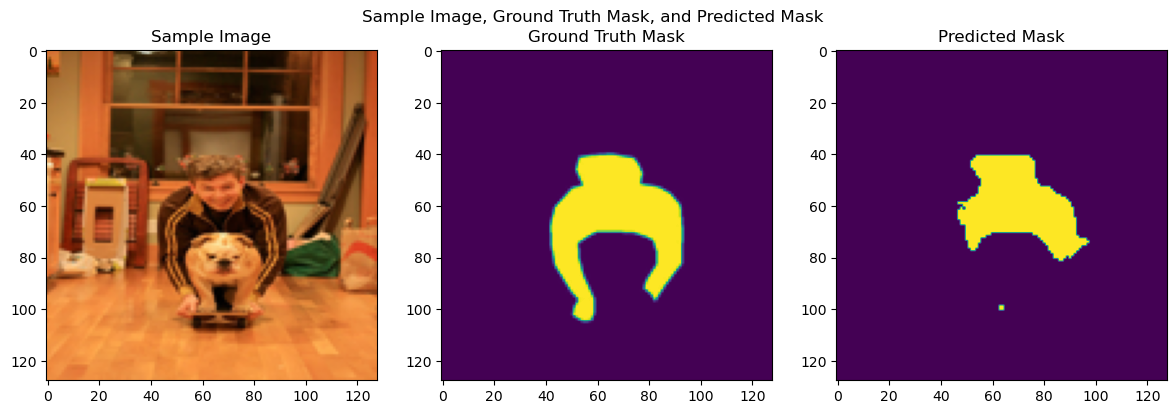

In [14]:
# Get a sample batch from the validation data generator
sample_images, sample_masks = val_generator[0]

# Generate predictions on the sample batch
predictions = model.predict(sample_images)

# Threshold the predictions (if needed)
threshold = 0.7  # Adjust the threshold as per your requirement
thresholded_predictions = (predictions > threshold).astype(np.uint8)

# Select a random index from the batch
idx = np.random.randint(0, sample_images.shape[0])

# Plot the sample image, ground truth mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot sample image
axes[0].imshow(sample_images[idx])
axes[0].set_title('Sample Image')

# Plot ground truth mask
axes[1].imshow(sample_masks[idx])
axes[1].set_title('Ground Truth Mask')

# Plot predicted mask
axes[2].imshow(thresholded_predictions[idx])
axes[2].set_title('Predicted Mask')

# Set common title for the figure
fig.suptitle('Sample Image, Ground Truth Mask, and Predicted Mask')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


1/1 [==============================] - 0s 21ms/step


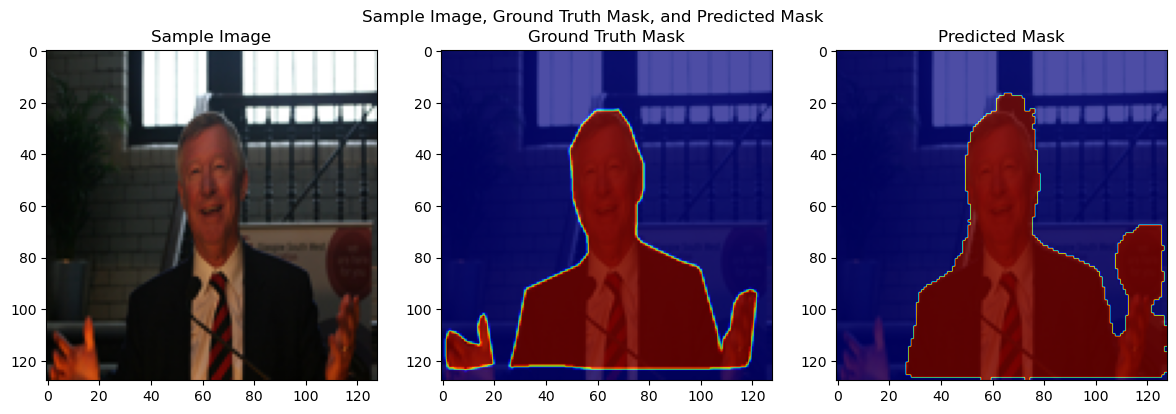

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Get a sample batch from the validation data generator
sample_images, sample_masks = val_generator[0]

# Generate predictions on the sample batch
predictions = model.predict(sample_images)

# Threshold the predictions (if needed)
threshold = 0.3  # Adjust the threshold as per your requirement
thresholded_predictions = (predictions > threshold).astype(np.uint8)

# Select a random index from the batch
idx = np.random.randint(0, sample_images.shape[0])

# Plot the sample image, ground truth mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot sample image
axes[0].imshow(sample_images[idx])
axes[0].set_title('Sample Image')

# Plot ground truth mask
axes[1].imshow(sample_images[idx])
axes[1].imshow(sample_masks[idx], cmap='jet', alpha=0.7)
axes[1].set_title('Ground Truth Mask')

# Plot predicted mask
axes[2].imshow(sample_images[idx])
axes[2].imshow(thresholded_predictions[idx], cmap='jet', alpha=0.7)
axes[2].set_title('Predicted Mask')

# Set common title for the figure
fig.suptitle('Sample Image, Ground Truth Mask, and Predicted Mask')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
